# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Chofifatul Hidayah
- **Email:** chofifatul23@gmail.com
- **ID Dicoding:** Chofifatul Hidayah M312B4KX0928

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) diantara 12 station selama bulan agustus?
- Bagaimana kecepatan angin (WSPM) mempengaruhi tingkat polusi udara(PM2.5, PM10) di setiap station?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data

**Insight:**
- Ditampilkan sumber data yang akan di assessing
- Menggunakan import pandas kita bisa mengakses data csv

In [ ]:
df_aotizhongxin = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_aotizhongxin.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [ ]:
df_changping = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Changping_20130301-20170228.csv")
df_changping.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [ ]:
df_dingling = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Dingling_20130301-20170228.csv")
df_dingling.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
df_dongsi = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
df_dongsi.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [ ]:
df_guanyuan = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Guanyuan_20130301-20170228.csv")
df_guanyuan.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

In [ ]:
df_gucheng = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Gucheng_20130301-20170228.csv")
df_gucheng.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [ ]:
df_huairou = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Huairou_20130301-20170228.csv")
df_huairou.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

In [ ]:
df_nongzhanguan = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df_nongzhanguan.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [ ]:
df_shunyi = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
df_shunyi.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [ ]:
df_tiantan = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Tiantan_20130301-20170228.csv")
df_tiantan.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [ ]:
df_wanliu = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
df_wanliu.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

In [ ]:
df_wanshouxigong = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/air_quality_dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df_wanshouxigong.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong


### Assessing Data

**Purpose:**
- Mengidentifikasi masalah yang terdapat dalam data
- Memastikan data tersebut berkualitas

1.   Missing Value




In [ ]:
df_aotizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
df_changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
df_dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
df_dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
df_guanyuan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
df_gucheng.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [ ]:
df_huairou.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [ ]:
df_nongzhanguan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
df_shunyi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [ ]:
df_tiantan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
df_wanliu.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [ ]:
df_wanshouxigong.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Berdasarkan dari perhitungan missing value pada setiap DataFrame diatas menunjukkan banyak sekali missing value atau nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN.

2.   Invalid Value



Disini akan diperiksa nilai negatif pada kolom polutan dan curah hujan, serta nilai tidak realistis seperti suhu (TEMP) di luar rentang yang wajar (misalnya, di bawah -50°C atau di atas 50°C)

In [ ]:
def detect_invalid_values(df):
    negative_values = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN']] < 0
    if negative_values.any().any():
        print(f"Negative values detected:\n{df[negative_values.any(axis=1)]}")
    else:
        print("No negative values")


In [ ]:
def detect_invalid_temp_values(df):
    invalid_temp_values = (df['TEMP'] < -50) | (df['TEMP'] > 50)

    if invalid_temp_values.any():
        print(f"Unrealistic temperature values detected:\n{df[invalid_temp_values]}")
    else:
        print("No unrealistic temperature values")


In [ ]:
detect_invalid_values(df_aotizhongxin)
detect_invalid_temp_values(df_aotizhongxin)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_changping)
detect_invalid_temp_values(df_changping)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_dingling)
detect_invalid_temp_values(df_dingling)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_dongsi)
detect_invalid_temp_values(df_dongsi)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_guanyuan)
detect_invalid_temp_values(df_guanyuan)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_gucheng)
detect_invalid_temp_values(df_gucheng)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_huairou)
detect_invalid_temp_values(df_huairou)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_nongzhanguan)
detect_invalid_temp_values(df_nongzhanguan)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_shunyi)
detect_invalid_temp_values(df_shunyi)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_tiantan)
detect_invalid_temp_values(df_tiantan)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_wanliu)
detect_invalid_temp_values(df_wanliu)

No negative values
No unrealistic temperature values


In [ ]:
detect_invalid_values(df_wanshouxigong)
detect_invalid_temp_values(df_wanshouxigong)

No negative values
No unrealistic temperature values


Berdasarkan analisis invalid value pada DataFrame diatas, nilai memenuhi syarat atau berdasarkan ketentuan yang berlaku.


3.   Duplicate Data



In [ ]:
df_aotizhongxin.duplicated().sum()

0

In [ ]:
df_changping.duplicated().sum()

0

In [ ]:
df_dingling.duplicated().sum()

0

In [ ]:
df_dongsi.duplicated().sum()

0

In [ ]:
df_guanyuan.duplicated().sum()

0

In [ ]:
df_gucheng.duplicated().sum()

0

In [ ]:
df_huairou.duplicated().sum()

0

In [ ]:
df_nongzhanguan.duplicated().sum()

0

In [ ]:
df_shunyi.duplicated().sum()

0

In [ ]:
df_tiantan.duplicated().sum()

0

In [ ]:
df_wanliu.duplicated().sum()

0

In [ ]:
df_wanshouxigong.duplicated().sum()

0

Berdasarkan penggunaan method duplicated() pada DataFrame diatas, tidak ada duplikasi yang terjadi.

4. Outliers

In [ ]:
def detect_outliers_iqr(df):
    outliers_dict = {}

    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()
        q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = df[(df[column] < minimum) | (df[column] > maximum)]

        if not outliers.empty:
            outliers_dict[column] = outliers

    if outliers_dict:
        for column, outliers in outliers_dict.items():
            print(f"Outliers detected in {column}:\n{outliers}\n")
    else:
        print("No outliers detected in any column")

    return outliers_dict

In [ ]:
detect_outliers_iqr(df_aotizhongxin)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
120      121  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0   
121      122  2013      3    6     1  272.0  300.0  131.0  166.0  4000.0   
140      141  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0   
141      142  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0   
142      143  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  277.0  277.0   55.0  150.0  4100.0   
34756  34757  2017      2   16     4  284.0  284.0   49.0  146.0  4000.0   
34757  34758  2017      2   16     5  275.0  275.0   46.0  129.0  3700.0   
34758  34759  2017      2   16     6  270.0  270.0   47.0  136.0  3700.0   
34759  34760  2017      2   16     7  270.0  270.0   54.0  125.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       stat

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 120      121  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0   
 121      122  2013      3    6     1  272.0  300.0  131.0  166.0  4000.0   
 140      141  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0   
 141      142  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0   
 142      143  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34755  34756  2017      2   16     3  277.0  277.0   55.0  150.0  4100.0   
 34756  34757  2017      2   16     4  284.0  284.0   49.0  146.0  4000.0   
 34757  34758  2017      2   16     5  275.0  275.0   46.0  129.0  3700.0   
 34758  34759  2017      2   16     6  270.0  270.0   47.0  136.0  3700.0   
 34759  34760  2017      2   16     7  270.0  270.0   54.0  125.0  3000.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  

In [ ]:
detect_outliers_iqr(df_changping)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
131      132  2013      3    6    11  239.0  280.0  123.0  126.0  3700.0   
132      133  2013      3    6    12  271.0  324.0  142.0  142.0  3799.0   
133      134  2013      3    6    13  281.0  315.0  118.0  135.0  3399.0   
134      135  2013      3    6    14  263.0  284.0  121.0  152.0  3600.0   
135      136  2013      3    6    15  293.0  347.0  118.0  160.0  3299.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34754  34755  2017      2   16     2  275.0  275.0   41.0   71.0  3100.0   
34755  34756  2017      2   16     3  264.0  264.0   16.0   68.0  2700.0   
34756  34757  2017      2   16     4  257.0  257.0   13.0   76.0  1900.0   
34757  34758  2017      2   16     5  243.0  243.0   19.0   88.0  2300.0   
34758  34759  2017      2   16     6  238.0  238.0   35.0   96.0  3200.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM    station

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 131      132  2013      3    6    11  239.0  280.0  123.0  126.0  3700.0   
 132      133  2013      3    6    12  271.0  324.0  142.0  142.0  3799.0   
 133      134  2013      3    6    13  281.0  315.0  118.0  135.0  3399.0   
 134      135  2013      3    6    14  263.0  284.0  121.0  152.0  3600.0   
 135      136  2013      3    6    15  293.0  347.0  118.0  160.0  3299.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34754  34755  2017      2   16     2  275.0  275.0   41.0   71.0  3100.0   
 34755  34756  2017      2   16     3  264.0  264.0   16.0   68.0  2700.0   
 34756  34757  2017      2   16     4  257.0  257.0   13.0   76.0  1900.0   
 34757  34758  2017      2   16     5  243.0  243.0   19.0   88.0  2300.0   
 34758  34759  2017      2   16     6  238.0  238.0   35.0   96.0  3200.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
 1

In [ ]:
detect_outliers_iqr(df_dingling)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
131      132  2013      3    6    11  217.0  218.0  93.0  106.0  2500.0   
132      133  2013      3    6    12  268.0  278.0  93.0  116.0  2500.0   
133      134  2013      3    6    13  258.0  274.0  89.0  100.0  2100.0   
134      135  2013      3    6    14  221.0  217.0  98.0   82.0  1800.0   
136      137  2013      3    6    16  294.0  351.0  88.0  139.0  2700.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
34753  34754  2017      2   16     1  249.0  249.0  24.0   69.0  2800.0   
34754  34755  2017      2   16     2  265.0  265.0  22.0   67.0  2800.0   
34755  34756  2017      2   16     3  265.0  265.0  22.0   65.0  2500.0   
34756  34757  2017      2   16     4  253.0  253.0  21.0   54.0  2500.0   
34757  34758  2017      2   16     5  247.0  247.0  26.0   47.0  2500.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
131     8

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
 131      132  2013      3    6    11  217.0  218.0  93.0  106.0  2500.0   
 132      133  2013      3    6    12  268.0  278.0  93.0  116.0  2500.0   
 133      134  2013      3    6    13  258.0  274.0  89.0  100.0  2100.0   
 134      135  2013      3    6    14  221.0  217.0  98.0   82.0  1800.0   
 136      137  2013      3    6    16  294.0  351.0  88.0  139.0  2700.0   
 ...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
 34753  34754  2017      2   16     1  249.0  249.0  24.0   69.0  2800.0   
 34754  34755  2017      2   16     2  265.0  265.0  22.0   67.0  2800.0   
 34755  34756  2017      2   16     3  265.0  265.0  22.0   65.0  2500.0   
 34756  34757  2017      2   16     4  253.0  253.0  21.0   54.0  2500.0   
 34757  34758  2017      2   16     5  247.0  247.0  26.0   47.0  2500.0   
 
           O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
 131     82.0 

In [ ]:
detect_outliers_iqr(df_dongsi)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
152      153  2013      3    7     8  292.0  314.0  100.0  174.0  6599.0   
153      154  2013      3    7     9  300.0  337.0  134.0  181.0  5299.0   
154      155  2013      3    7    10  289.0  313.0  126.0  180.0  4200.0   
156      157  2013      3    7    12  288.0  324.0  121.0  254.0  5200.0   
157      158  2013      3    7    13  312.0  319.0  108.0  202.0  3600.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  275.0  275.0   55.0  137.0  2500.0   
34756  34757  2017      2   16     4  278.0  278.0   49.0  136.0  2600.0   
34757  34758  2017      2   16     5  268.0  268.0   46.0  127.0  3500.0   
34758  34759  2017      2   16     6  273.0  273.0   44.0  133.0  3600.0   
34759  34760  2017      2   16     7  265.0  265.0   48.0  121.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  


{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 152      153  2013      3    7     8  292.0  314.0  100.0  174.0  6599.0   
 153      154  2013      3    7     9  300.0  337.0  134.0  181.0  5299.0   
 154      155  2013      3    7    10  289.0  313.0  126.0  180.0  4200.0   
 156      157  2013      3    7    12  288.0  324.0  121.0  254.0  5200.0   
 157      158  2013      3    7    13  312.0  319.0  108.0  202.0  3600.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34755  34756  2017      2   16     3  275.0  275.0   55.0  137.0  2500.0   
 34756  34757  2017      2   16     4  278.0  278.0   49.0  136.0  2600.0   
 34757  34758  2017      2   16     5  268.0  268.0   46.0  127.0  3500.0   
 34758  34759  2017      2   16     6  273.0  273.0   44.0  133.0  3600.0   
 34759  34760  2017      2   16     7  265.0  265.0   48.0  121.0  3000.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
 152 

In [ ]:
detect_outliers_iqr(df_guanyuan)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
153      154  2013      3    7     9  262.0  342.0  140.0  184.0  5900.0   
154      155  2013      3    7    10  278.0  333.0  141.0  199.0  5000.0   
155      156  2013      3    7    11  280.0  299.0  127.0  233.0  5299.0   
156      157  2013      3    7    12  289.0  328.0  109.0  270.0  5700.0   
157      158  2013      3    7    13  297.0  344.0   92.0  204.0  3700.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34752  34753  2017      2   16     0  267.0  267.0   60.0  155.0  2800.0   
34753  34754  2017      2   16     1  262.0  262.0   52.0  147.0  2500.0   
34754  34755  2017      2   16     2  262.0  262.0   38.0  133.0  2000.0   
34755  34756  2017      2   16     3  259.0  259.0   40.0  133.0  3000.0   
34756  34757  2017      2   16     4  260.0  260.0   38.0  129.0  2700.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station 

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 153      154  2013      3    7     9  262.0  342.0  140.0  184.0  5900.0   
 154      155  2013      3    7    10  278.0  333.0  141.0  199.0  5000.0   
 155      156  2013      3    7    11  280.0  299.0  127.0  233.0  5299.0   
 156      157  2013      3    7    12  289.0  328.0  109.0  270.0  5700.0   
 157      158  2013      3    7    13  297.0  344.0   92.0  204.0  3700.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34752  34753  2017      2   16     0  267.0  267.0   60.0  155.0  2800.0   
 34753  34754  2017      2   16     1  262.0  262.0   52.0  147.0  2500.0   
 34754  34755  2017      2   16     2  262.0  262.0   38.0  133.0  2000.0   
 34755  34756  2017      2   16     3  259.0  259.0   40.0  133.0  3000.0   
 34756  34757  2017      2   16     4  260.0  260.0   38.0  129.0  2700.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
 15

In [ ]:
detect_outliers_iqr(df_gucheng)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
141      142  2013      3    6    21  287.0  349.0  151.0  172.0  4099.0   
142      143  2013      3    6    22  292.0  347.0  121.0  164.0  4299.0   
143      144  2013      3    6    23  272.0  329.0  125.0  166.0  4799.0   
144      145  2013      3    7     0  279.0  373.0  114.0  163.0  5200.0   
145      146  2013      3    7     1  284.0  391.0  101.0  160.0  5200.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  271.0  271.0   39.0   99.0  3300.0   
34756  34757  2017      2   16     4  262.0  262.0   41.0   85.0  3200.0   
34757  34758  2017      2   16     5  264.0  264.0   41.0   76.0  3100.0   
34758  34759  2017      2   16     6  258.0  258.0   36.0   76.0  3000.0   
34759  34760  2017      2   16     7  257.0  257.0   41.0  120.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 141      142  2013      3    6    21  287.0  349.0  151.0  172.0  4099.0   
 142      143  2013      3    6    22  292.0  347.0  121.0  164.0  4299.0   
 143      144  2013      3    6    23  272.0  329.0  125.0  166.0  4799.0   
 144      145  2013      3    7     0  279.0  373.0  114.0  163.0  5200.0   
 145      146  2013      3    7     1  284.0  391.0  101.0  160.0  5200.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34755  34756  2017      2   16     3  271.0  271.0   39.0   99.0  3300.0   
 34756  34757  2017      2   16     4  262.0  262.0   41.0   85.0  3200.0   
 34757  34758  2017      2   16     5  264.0  264.0   41.0   76.0  3100.0   
 34758  34759  2017      2   16     6  258.0  258.0   36.0   76.0  3000.0   
 34759  34760  2017      2   16     7  257.0  257.0   41.0  120.0  3000.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
 141

In [ ]:
detect_outliers_iqr(df_huairou)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
141      142  2013      3    6    21  267.0  354.0  66.0  150.0  4400.0   
142      143  2013      3    6    22  288.0  354.0  54.0  132.0  3500.0   
143      144  2013      3    6    23  245.0  279.0  49.0  127.0  4000.0   
144      145  2013      3    7     0  240.0  276.0  44.0  116.0  3500.0   
145      146  2013      3    7     1  231.0  239.0  33.0  101.0  2600.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
34755  34756  2017      2   16     3  227.0  227.0  24.0   57.0  2900.0   
34756  34757  2017      2   16     4  222.0  222.0  20.0   49.0  2600.0   
34757  34758  2017      2   16     5  222.0  222.0  17.0    2.0  2600.0   
34758  34759  2017      2   16     6  226.0  226.0  20.0   57.0  2600.0   
34759  34760  2017      2   16     7  227.0  227.0  24.0   69.0  2000.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
141     65

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
 141      142  2013      3    6    21  267.0  354.0  66.0  150.0  4400.0   
 142      143  2013      3    6    22  288.0  354.0  54.0  132.0  3500.0   
 143      144  2013      3    6    23  245.0  279.0  49.0  127.0  4000.0   
 144      145  2013      3    7     0  240.0  276.0  44.0  116.0  3500.0   
 145      146  2013      3    7     1  231.0  239.0  33.0  101.0  2600.0   
 ...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
 34755  34756  2017      2   16     3  227.0  227.0  24.0   57.0  2900.0   
 34756  34757  2017      2   16     4  222.0  222.0  20.0   49.0  2600.0   
 34757  34758  2017      2   16     5  222.0  222.0  17.0    2.0  2600.0   
 34758  34759  2017      2   16     6  226.0  226.0  20.0   57.0  2600.0   
 34759  34760  2017      2   16     7  227.0  227.0  24.0   69.0  2000.0   
 
           O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
 141     65.0  

In [ ]:
detect_outliers_iqr(df_nongzhanguan)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
149      150  2013      3    7     5  291.0  321.0   69.0  159.0  7200.0   
150      151  2013      3    7     6  314.0  337.0   88.0  165.0  6500.0   
151      152  2013      3    7     7  318.0  331.0   87.0  157.0  5500.0   
152      153  2013      3    7     8  300.0  301.0  111.0  150.0  5000.0   
153      154  2013      3    7     9  281.0  287.0  160.0  149.0  4099.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  272.0  272.0   50.0   84.0  3500.0   
34756  34757  2017      2   16     4  272.0  272.0   51.0  102.0  3600.0   
34757  34758  2017      2   16     5  273.0  273.0   49.0  139.0  3400.0   
34758  34759  2017      2   16     6  274.0  274.0   43.0  139.0  3500.0   
34759  34760  2017      2   16     7  259.0  259.0   43.0  117.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       stat

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 149      150  2013      3    7     5  291.0  321.0   69.0  159.0  7200.0   
 150      151  2013      3    7     6  314.0  337.0   88.0  165.0  6500.0   
 151      152  2013      3    7     7  318.0  331.0   87.0  157.0  5500.0   
 152      153  2013      3    7     8  300.0  301.0  111.0  150.0  5000.0   
 153      154  2013      3    7     9  281.0  287.0  160.0  149.0  4099.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34755  34756  2017      2   16     3  272.0  272.0   50.0   84.0  3500.0   
 34756  34757  2017      2   16     4  272.0  272.0   51.0  102.0  3600.0   
 34757  34758  2017      2   16     5  273.0  273.0   49.0  139.0  3400.0   
 34758  34759  2017      2   16     6  274.0  274.0   43.0  139.0  3500.0   
 34759  34760  2017      2   16     7  259.0  259.0   43.0  117.0  3000.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  

In [ ]:
detect_outliers_iqr(df_shunyi)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
144      145  2013      3    7     0  299.0  312.0  76.0  117.0  4500.0  26.0   
145      146  2013      3    7     1  312.0  320.0  71.0  113.0  4500.0  26.0   
146      147  2013      3    7     2  275.0  308.0  71.0  105.0  4500.0  26.0   
147      148  2013      3    7     3  278.0  305.0  55.0   99.0  4400.0  26.0   
148      149  2013      3    7     4  255.0  290.0  43.0   91.0  3500.0  26.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34750  34751  2017      2   15    22  272.0  272.0  61.0  151.0  3000.0   2.0   
34751  34752  2017      2   15    23  256.0  256.0  51.0  145.0  3000.0   2.0   
34752  34753  2017      2   16     0  254.0  254.0  48.0  148.0  3400.0  81.0   
34753  34754  2017      2   16     1  272.0  272.0  47.0  140.0  4400.0  81.0   
34754  34755  2017      2   16     2  253.0  253.0  45.0  123.0  3700.0  81.0   


{'PM2.5':           No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
 144      145  2013      3    7     0  299.0  312.0  76.0  117.0  4500.0  26.0   
 145      146  2013      3    7     1  312.0  320.0  71.0  113.0  4500.0  26.0   
 146      147  2013      3    7     2  275.0  308.0  71.0  105.0  4500.0  26.0   
 147      148  2013      3    7     3  278.0  305.0  55.0   99.0  4400.0  26.0   
 148      149  2013      3    7     4  255.0  290.0  43.0   91.0  3500.0  26.0   
 ...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
 34750  34751  2017      2   15    22  272.0  272.0  61.0  151.0  3000.0   2.0   
 34751  34752  2017      2   15    23  256.0  256.0  51.0  145.0  3000.0   2.0   
 34752  34753  2017      2   16     0  254.0  254.0  48.0  148.0  3400.0  81.0   
 34753  34754  2017      2   16     1  272.0  272.0  47.0  140.0  4400.0  81.0   
 34754  34755  2017      2   16     2  253.0  253.0  45.0  123.0  3700.0  81.0   
 
     

In [ ]:
detect_outliers_iqr(df_tiantan)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
146      147  2013      3    7     2  259.0  276.0   55.0  119.0  4200.0   
154      155  2013      3    7    10  296.0  314.0  136.0  210.0  7700.0   
155      156  2013      3    7    11  366.0  409.0  148.0  228.0  6799.0   
156      157  2013      3    7    12  390.0  412.0  161.0  230.0  5700.0   
157      158  2013      3    7    13  386.0  392.0  133.0  168.0  3799.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34754  34755  2017      2   16     2  262.0  271.0   50.0  148.0  3400.0   
34755  34756  2017      2   16     3  252.0  261.0   50.0  144.0  3400.0   
34757  34758  2017      2   16     5  260.0  260.0   44.0  132.0  3300.0   
34758  34759  2017      2   16     6  252.0  252.0   41.0  133.0  3300.0   
34759  34760  2017      2   16     7  251.0  251.0   43.0  128.0     NaN   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 146      147  2013      3    7     2  259.0  276.0   55.0  119.0  4200.0   
 154      155  2013      3    7    10  296.0  314.0  136.0  210.0  7700.0   
 155      156  2013      3    7    11  366.0  409.0  148.0  228.0  6799.0   
 156      157  2013      3    7    12  390.0  412.0  161.0  230.0  5700.0   
 157      158  2013      3    7    13  386.0  392.0  133.0  168.0  3799.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34754  34755  2017      2   16     2  262.0  271.0   50.0  148.0  3400.0   
 34755  34756  2017      2   16     3  252.0  261.0   50.0  144.0  3400.0   
 34757  34758  2017      2   16     5  260.0  260.0   44.0  132.0  3300.0   
 34758  34759  2017      2   16     6  252.0  252.0   41.0  133.0  3300.0   
 34759  34760  2017      2   16     7  251.0  251.0   43.0  128.0     NaN   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
 146

In [ ]:
detect_outliers_iqr(df_wanliu)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
118      119  2013      3    5    22  270.0  343.0   98.0  172.0  4700.0   
119      120  2013      3    5    23  268.0  328.0  106.0  158.0  4200.0   
137      138  2013      3    6    17  259.0  330.0  141.0  152.0  3200.0   
142      143  2013      3    6    22  266.0  322.0  133.0  138.0  4000.0   
143      144  2013      3    6    23  266.0  328.0  104.0  129.0  4299.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34752  34753  2017      2   16     0  266.0  266.0   51.0  156.0  3900.0   
34753  34754  2017      2   16     1  264.0  264.0   45.0  148.0  3900.0   
34754  34755  2017      2   16     2  269.0  269.0   42.0  137.0  4000.0   
34755  34756  2017      2   16     3  261.0  261.0   39.0  136.0  3900.0   
34757  34758  2017      2   16     5  256.0  256.0   38.0  124.0  3700.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  


{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 118      119  2013      3    5    22  270.0  343.0   98.0  172.0  4700.0   
 119      120  2013      3    5    23  268.0  328.0  106.0  158.0  4200.0   
 137      138  2013      3    6    17  259.0  330.0  141.0  152.0  3200.0   
 142      143  2013      3    6    22  266.0  322.0  133.0  138.0  4000.0   
 143      144  2013      3    6    23  266.0  328.0  104.0  129.0  4299.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34752  34753  2017      2   16     0  266.0  266.0   51.0  156.0  3900.0   
 34753  34754  2017      2   16     1  264.0  264.0   45.0  148.0  3900.0   
 34754  34755  2017      2   16     2  269.0  269.0   42.0  137.0  4000.0   
 34755  34756  2017      2   16     3  261.0  261.0   39.0  136.0  3900.0   
 34757  34758  2017      2   16     5  256.0  256.0   38.0  124.0  3700.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
 118 

In [ ]:
detect_outliers_iqr(df_wanshouxigong)

Outliers detected in PM2.5:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
144      145  2013      3    7     0  258.0  292.0  123.0  129.0  5299.0   
145      146  2013      3    7     1  270.0  316.0  103.0  124.0  5200.0   
146      147  2013      3    7     2  280.0  317.0  100.0  118.0  4500.0   
147      148  2013      3    7     3  264.0  285.0   98.0  110.0  4099.0   
153      154  2013      3    7     9  262.0  306.0  137.0  158.0  6000.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  266.0  266.0   46.0  146.0  3200.0   
34756  34757  2017      2   16     4  264.0  264.0   45.0  140.0  3300.0   
34757  34758  2017      2   16     5  262.0  262.0   42.0  127.0  3000.0   
34758  34759  2017      2   16     6  261.0  261.0   40.0  132.0  3200.0   
34759  34760  2017      2   16     7  256.0  256.0   42.0  132.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        sta

{'PM2.5':           No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
 144      145  2013      3    7     0  258.0  292.0  123.0  129.0  5299.0   
 145      146  2013      3    7     1  270.0  316.0  103.0  124.0  5200.0   
 146      147  2013      3    7     2  280.0  317.0  100.0  118.0  4500.0   
 147      148  2013      3    7     3  264.0  285.0   98.0  110.0  4099.0   
 153      154  2013      3    7     9  262.0  306.0  137.0  158.0  6000.0   
 ...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
 34755  34756  2017      2   16     3  266.0  266.0   46.0  146.0  3200.0   
 34756  34757  2017      2   16     4  264.0  264.0   45.0  140.0  3300.0   
 34757  34758  2017      2   16     5  262.0  262.0   42.0  127.0  3000.0   
 34758  34759  2017      2   16     6  261.0  261.0   40.0  132.0  3200.0   
 34759  34760  2017      2   16     7  256.0  256.0   42.0  132.0  3000.0   
 
          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station 

Dari analisis diatas terdapat banyak outlier pada tiap DataFrame.

**Insight:**
- Berdasarkan dari perhitungan missing value pada setiap DataFrame diatas menunjukkan banyak sekali missing value atau nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN.
- Berdasarkan analisis invalid value pada DataFrame diatas, nilai memenuhi syarat atau berdasarkan ketentuan yang berlaku.
- Berdasarkan penggunaan method duplicated() pada DataFrame diatas, tidak ada duplikasi yang terjadi.
- Dari pengecekan menggunakan IQR method diatas terdapat banyak outlier pada tiap DataFrame.

### Cleaning Data

Penggunaan Imputation untuk mengatasi missing value pada DataFrame

In [ ]:
def imputation_cleaning_data(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [ ]:
imputation_cleaning_data(df_aotizhongxin)
imputation_cleaning_data(df_changping)
imputation_cleaning_data(df_dingling)
imputation_cleaning_data(df_dongsi)
imputation_cleaning_data(df_guanyuan)
imputation_cleaning_data(df_gucheng)
imputation_cleaning_data(df_huairou)
imputation_cleaning_data(df_nongzhanguan)
imputation_cleaning_data(df_shunyi)
imputation_cleaning_data(df_tiantan)
imputation_cleaning_data(df_wanliu)
imputation_cleaning_data(df_wanshouxigong)

Pengecekan apakah masih terdapat missing value pada DataFrame.

In [ ]:
print(df_aotizhongxin.isnull().sum(), "\n")
print(df_changping.isnull().sum(), "\n")
print(df_dingling.isnull().sum(), "\n")
print(df_dongsi.isnull().sum(), "\n")
print(df_guanyuan.isnull().sum(), "\n")
print(df_gucheng.isnull().sum(), "\n")
print(df_huairou.isnull().sum(), "\n")
print(df_nongzhanguan.isnull().sum(), "\n")
print(df_shunyi.isnull().sum(), "\n")
print(df_tiantan.isnull().sum(), "\n")
print(df_wanliu.isnull().sum(), "\n")
print(df_wanshouxigong.isnull().sum(), "\n")

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

No  

Gunakan metode winsorize untuk menangani outliers.

In [ ]:
def replace_outliers_with_median(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        q25, q75 = np.percentile(df[column].dropna(), 25), np.percentile(df[column].dropna(), 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        # Replace outliers with median
        median = df[column].median()
        df[column] = np.where((df[column] < minimum) | (df[column] > maximum), median, df[column])

    return df


In [ ]:
print(replace_outliers_with_median(df_aotizhongxin))
print(replace_outliers_with_median(df_changping))
print(replace_outliers_with_median(df_dingling))
print(replace_outliers_with_median(df_dongsi))
print(replace_outliers_with_median(df_guanyuan))
print(replace_outliers_with_median(df_gucheng))
print(replace_outliers_with_median(df_huairou))
print(replace_outliers_with_median(df_nongzhanguan))
print(replace_outliers_with_median(df_shunyi))
print(replace_outliers_with_median(df_tiantan))
print(replace_outliers_with_median(df_wanliu))
print(replace_outliers_with_median(df_wanshouxigong))

            No    year  month   day  hour  PM2.5  PM10   SO2   NO2     CO  \
0        351.0  2013.0    3.0   1.0   0.0    4.0   6.0   4.0   7.0  300.0   
1        351.0  2013.0    3.0   1.0   1.0    8.0   8.0   4.0   7.0  300.0   
2        351.0  2013.0    3.0   1.0   2.0    7.0   7.0   5.0  10.0  300.0   
3        351.0  2013.0    3.0   1.0   3.0    6.0   6.0  11.0  11.0  300.0   
4        351.0  2013.0    3.0   1.0   4.0    3.0   6.0  12.0  12.0  300.0   
...        ...     ...    ...   ...   ...    ...   ...   ...   ...    ...   
35059  34714.0  2017.0    2.0  28.0  19.0   12.0  29.0   5.0  35.0  400.0   
35060  34714.0  2017.0    2.0  28.0  20.0   13.0  37.0   7.0  45.0  500.0   
35061  34714.0  2017.0    2.0  28.0  21.0   16.0  37.0  10.0  66.0  700.0   
35062  34714.0  2017.0    2.0  28.0  22.0   21.0  44.0  12.0  87.0  700.0   
35063  34714.0  2017.0    2.0  28.0  23.0   19.0  31.0  10.0  79.0  600.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      77.

Setelah dilakukan winsorize untuk menangani outliers maka dilakukan pengecekan kembali outliers.

In [ ]:
print(detect_outliers_iqr(df_aotizhongxin))
print(detect_outliers_iqr(df_changping))
print(detect_outliers_iqr(df_dingling))
print(detect_outliers_iqr(df_dongsi))
print(detect_outliers_iqr(df_guanyuan))
print(detect_outliers_iqr(df_gucheng))
print(detect_outliers_iqr(df_huairou))
print(detect_outliers_iqr(df_nongzhanguan))
print(detect_outliers_iqr(df_shunyi))
print(detect_outliers_iqr(df_tiantan))
print(detect_outliers_iqr(df_wanliu))
print(detect_outliers_iqr(df_wanshouxigong))

Outliers detected in PM2.5:
            No    year  month   day  hour  PM2.5   PM10   SO2    NO2      CO  \
114      351.0  2013.0    3.0   5.0  18.0  203.0  248.0   9.0   53.0   900.0   
115      351.0  2013.0    3.0   5.0  19.0  210.0  255.0   9.0   53.0  2200.0   
116      351.0  2013.0    3.0   5.0  20.0  205.0  244.0   9.0   53.0   900.0   
128      351.0  2013.0    3.0   6.0   8.0  194.0  205.0   9.0  113.0   900.0   
133      351.0  2013.0    3.0   6.0  13.0  201.0  233.0   9.0  136.0   900.0   
...        ...     ...    ...   ...   ...    ...    ...   ...    ...     ...   
34717  34714.0  2017.0    2.0  14.0  13.0  198.0  198.0   9.0  111.0   900.0   
34721  34714.0  2017.0    2.0  14.0  17.0  210.0  210.0   9.0  124.0   900.0   
34722  34714.0  2017.0    2.0  14.0  18.0  205.0  205.0  33.0  132.0   900.0   
34723  34714.0  2017.0    2.0  14.0  19.0  210.0  210.0  29.0  127.0   900.0   
34836  34714.0  2017.0    2.0  19.0  12.0  195.0  198.0   9.0   96.0   900.0   

         O3

**Insight:**
- Untuk menangani missing value dapat menggunakan imputation method dengan mengganti missing value dengan median.
- Untuk menangani outliers dapat menggunakan inputation jugae, tetapi tidak semua outliers akan hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

In [ ]:
df_all = pd.concat([df_aotizhongxin, df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong], ignore_index=True)

df_august = df_all[df_all['month'] == 8]

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
august_pollution = df_august.groupby('station')[pollutants].mean().reset_index()

print(august_pollution.head())


        station      PM2.5       PM10       SO2        NO2          CO  \
0  Aotizhongxin  55.204637  71.845128  4.485142  48.677646  779.435484   
1     Changping  45.121405  61.919859  4.138051  27.643208  712.701613   
2      Dingling  42.186458  53.567406  3.893313  13.687198  638.508065   
3        Dongsi  58.624563  73.607728  5.966657  41.125080  936.928763   
4      Guanyuan  58.309341  76.192171  4.916863  44.261309  840.591398   

          O3  
0  62.356916  
1  65.615263  
2  73.205101  
3  65.401604  
4  64.587962  


### Pertanyaan 1: Bagaimana perbandingan polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) diantara 12 station selama bulan agustus?

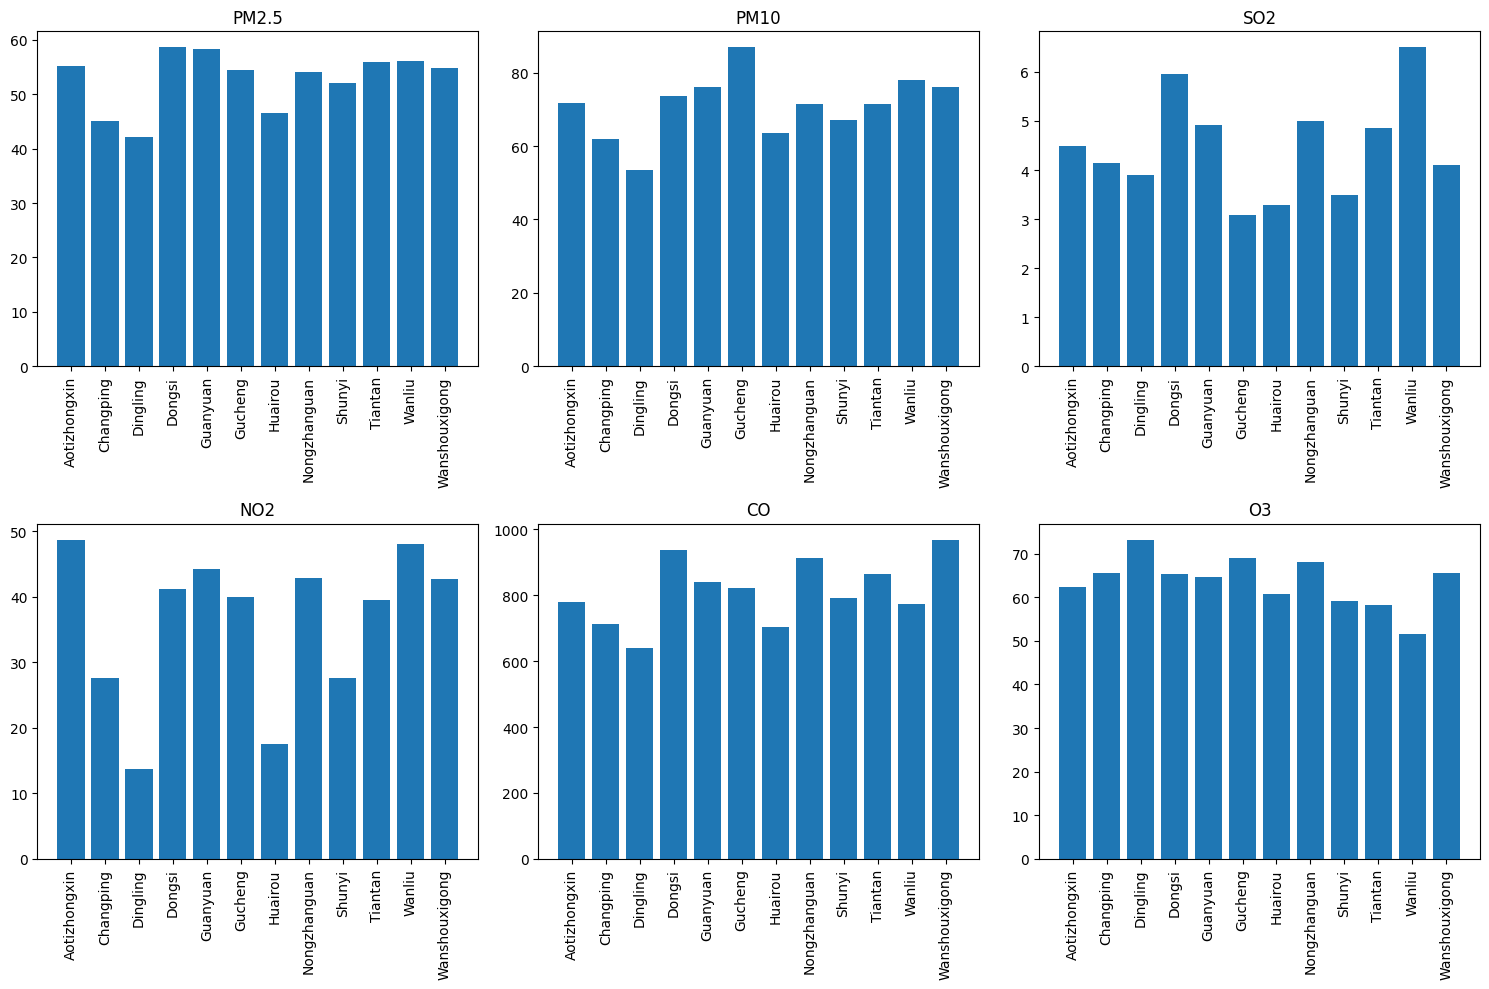

In [ ]:
stations = august_pollution['station']
x_locs = range(len(stations))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for i, pollutant in enumerate(pollutants):
    row, col = divmod(i, 3)
    axes[row, col].bar(x_locs, august_pollution[pollutant])
    axes[row, col].set_title(pollutant)
    axes[row, col].set_xticks(x_locs)
    axes[row, col].set_xticklabels(stations, rotation=90)

plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana kecepatan angin (WSPM) mempengaruhi tingkat polusi udara(PM2.5, PM10) di setiap station?

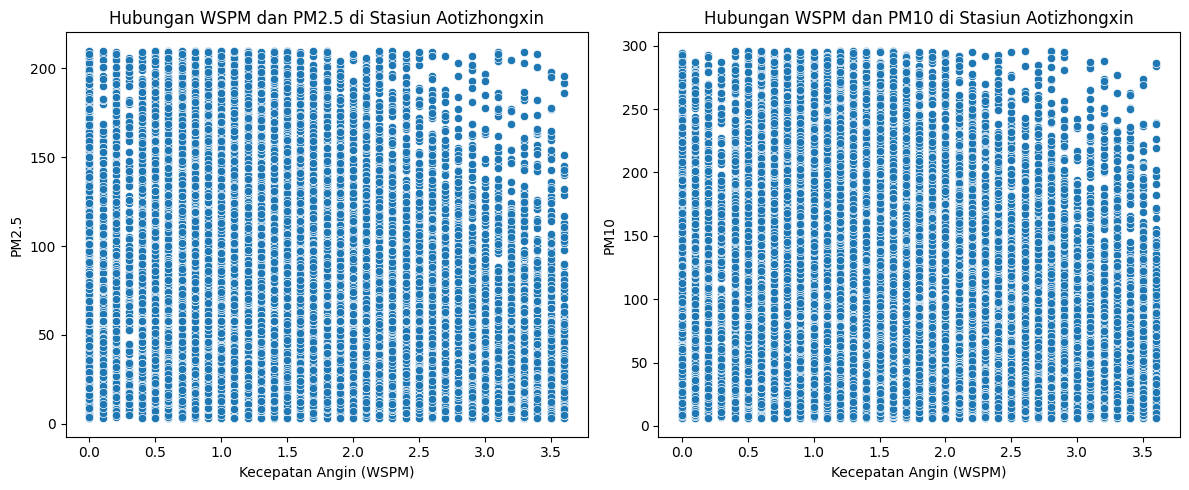

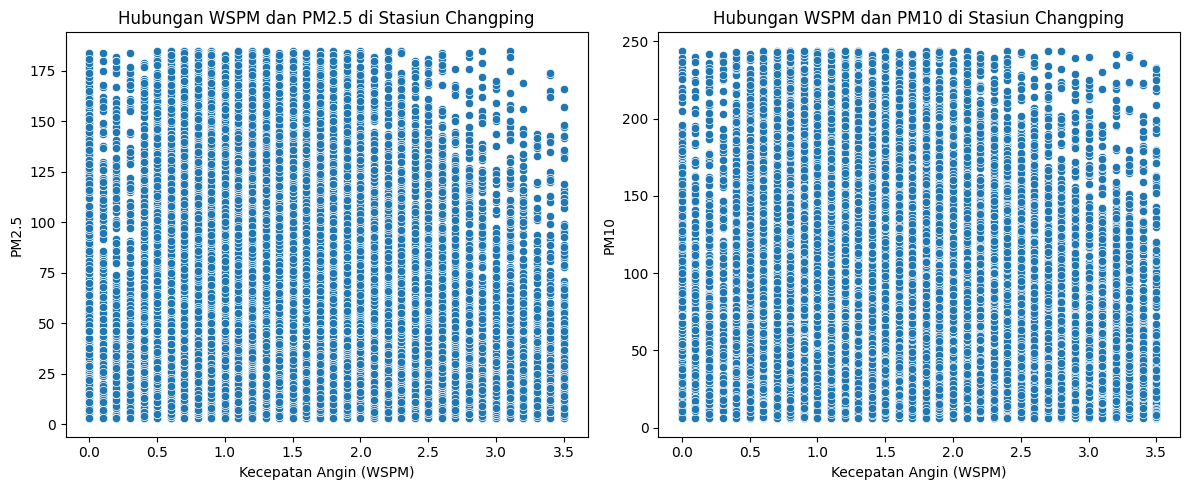

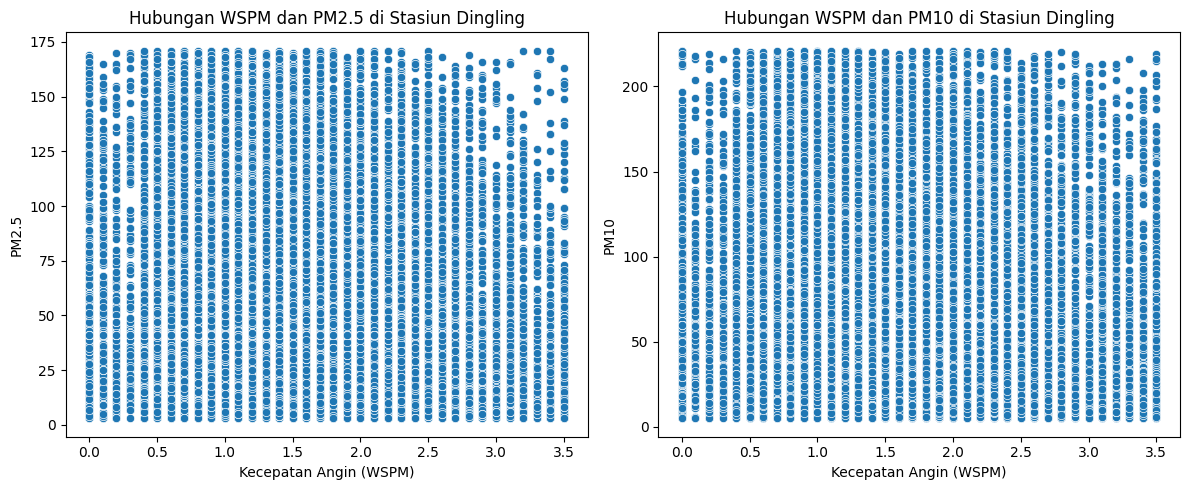

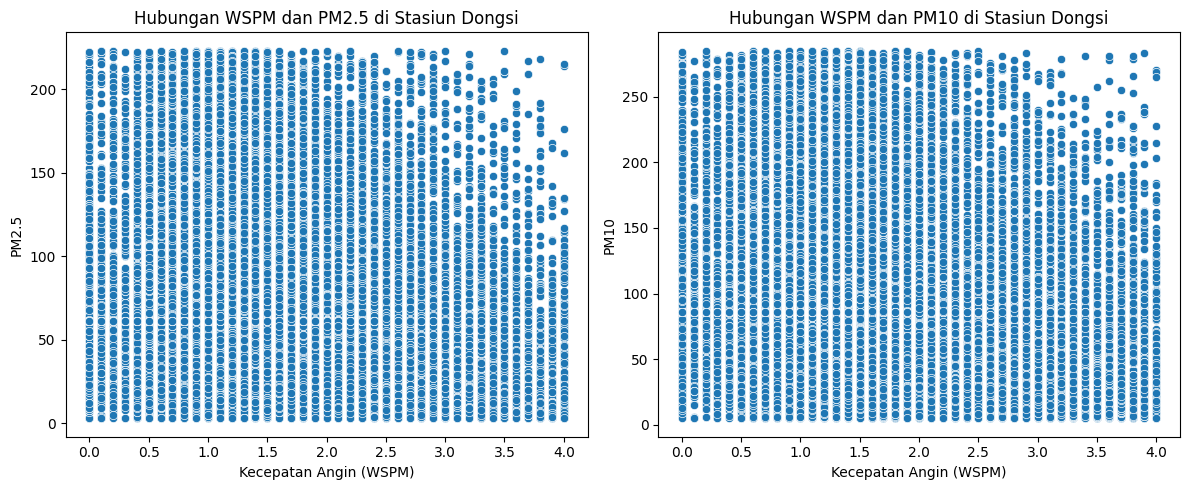

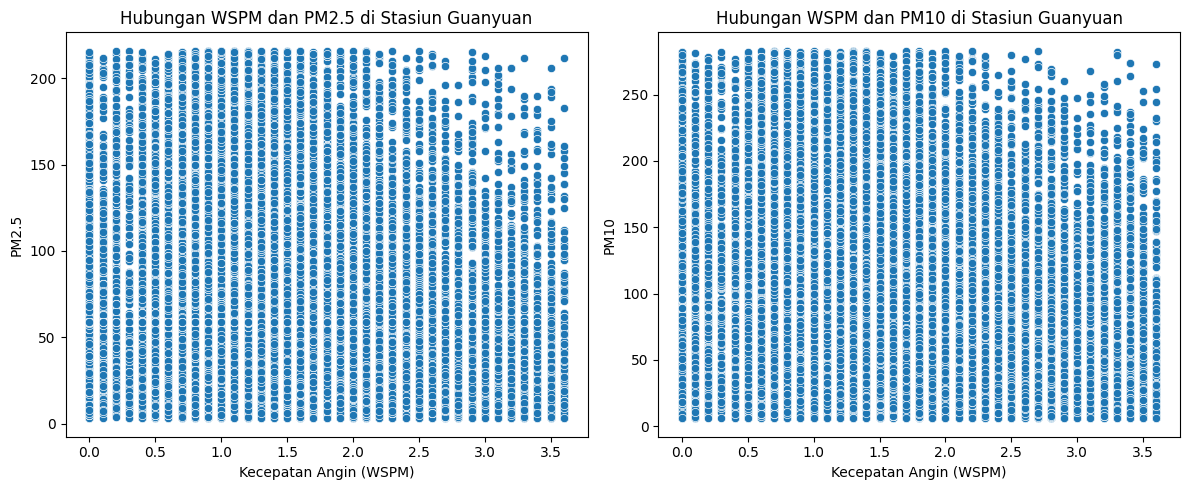

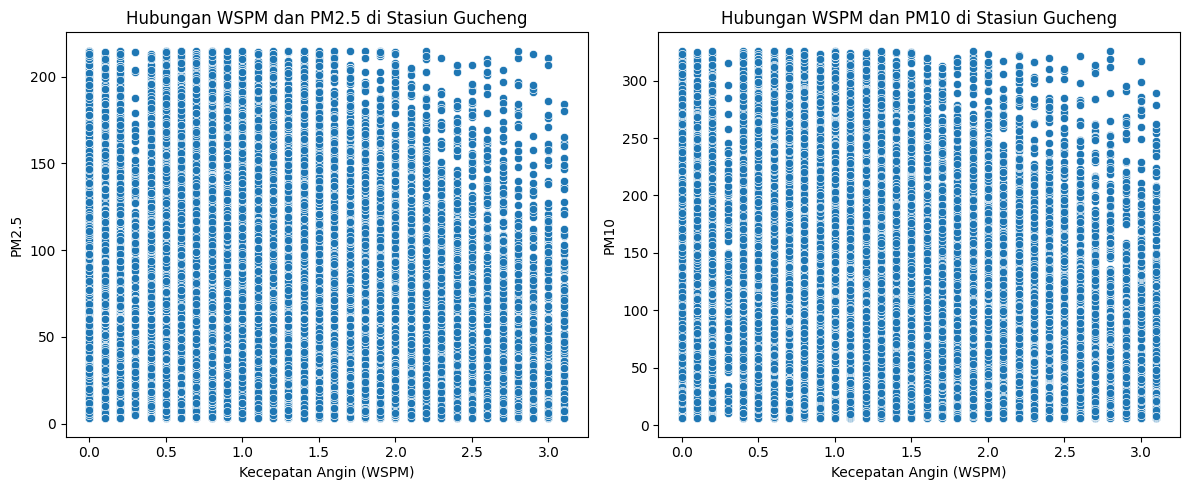

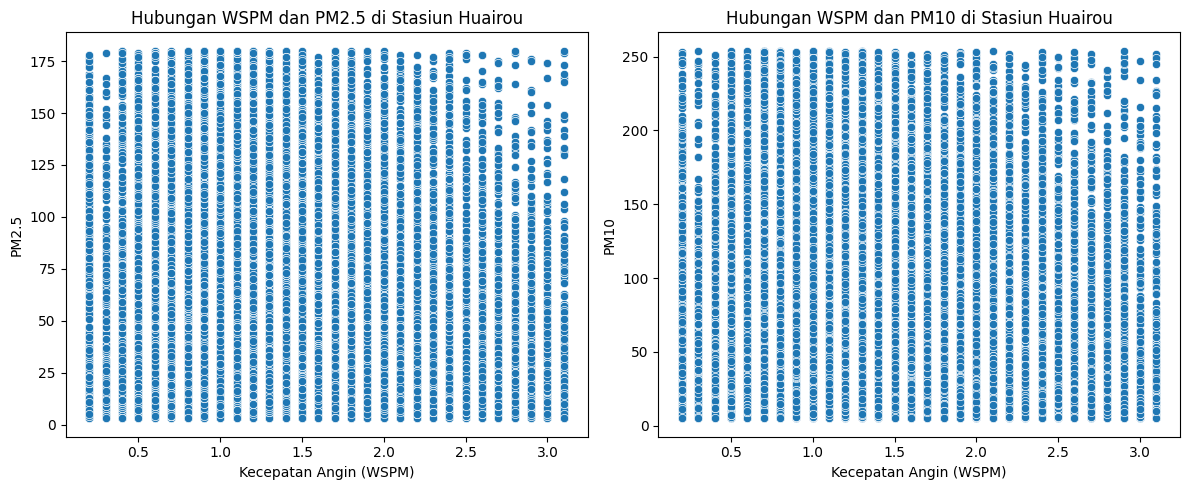

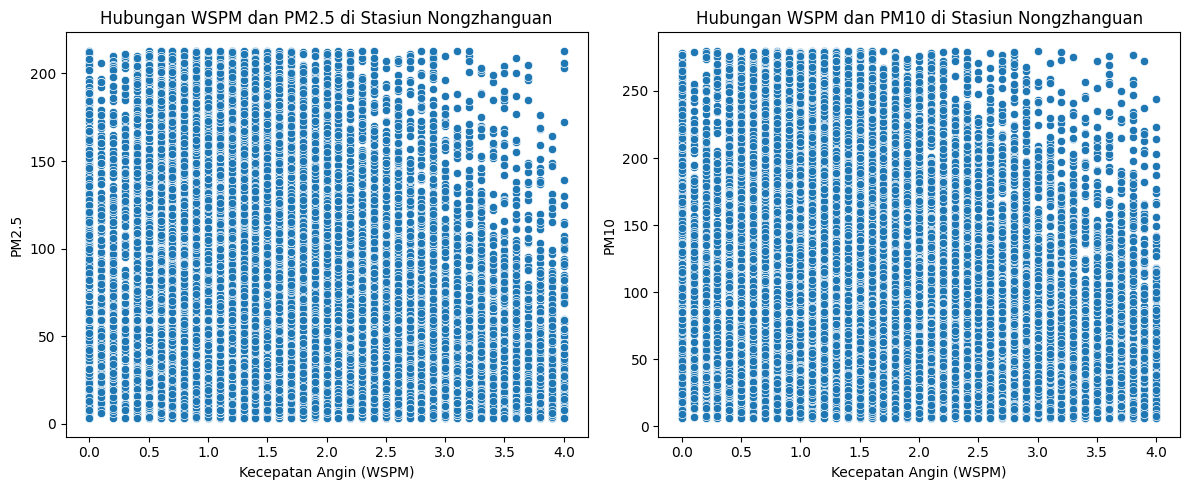

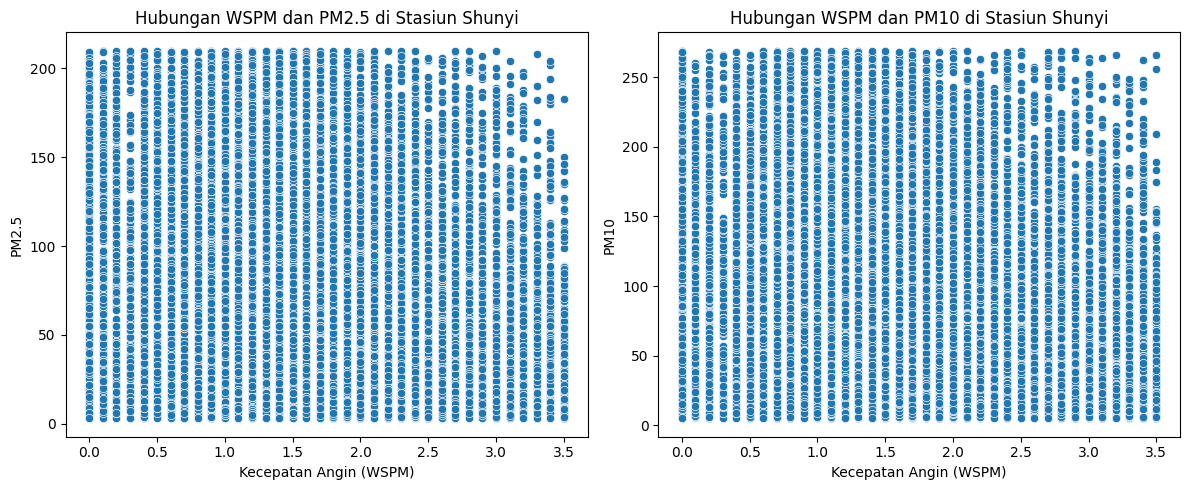

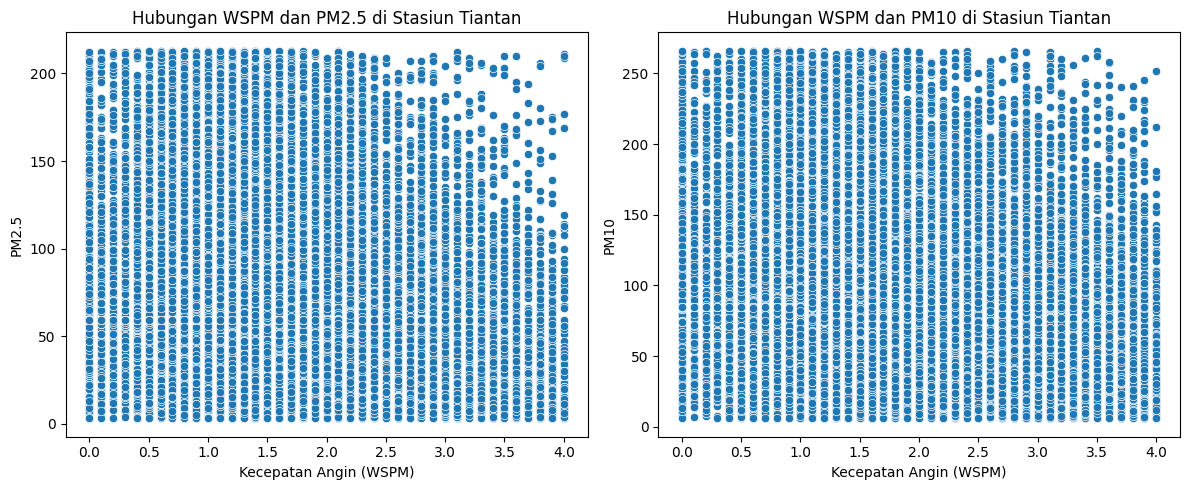

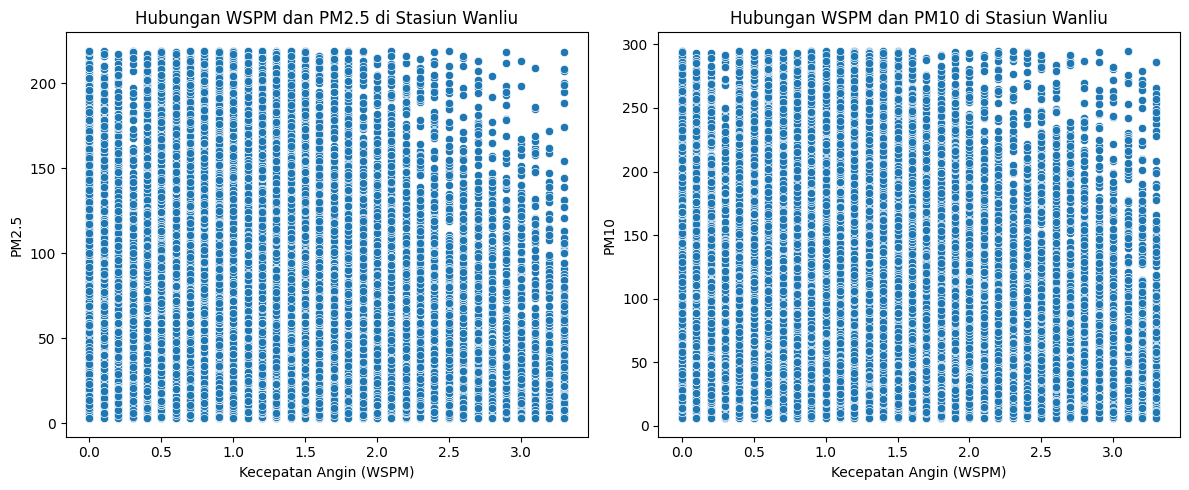

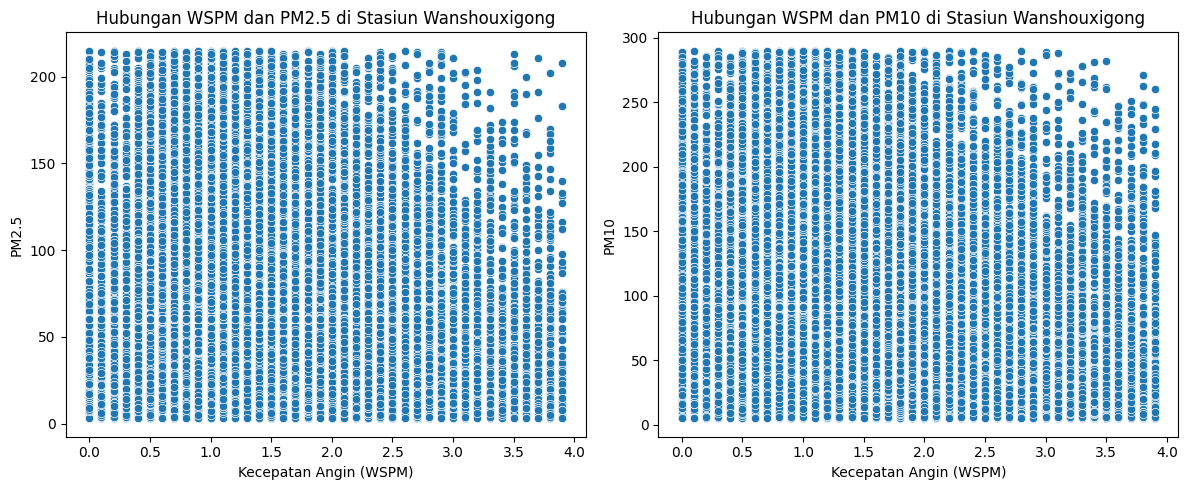

Korelasi antara kecepatan angin (WSPM) dan PM2.5 di setiap stasiun:
{'Aotizhongxin': -0.19225008225408122, 'Changping': -0.16018682116853883, 'Dingling': -0.13121219350641744, 'Dongsi': -0.2110702167963346, 'Guanyuan': -0.1944871273676229, 'Gucheng': -0.16826006621175624, 'Huairou': -0.12779484476995573, 'Nongzhanguan': -0.21268472176143294, 'Shunyi': -0.16688290298830208, 'Tiantan': -0.21885866770026527, 'Wanliu': -0.16602006548935602, 'Wanshouxigong': -0.23088113018494638}

Korelasi antara kecepatan angin (WSPM) dan PM10 di setiap stasiun:
{'Aotizhongxin': -0.18994327163767463, 'Changping': -0.13195690798176898, 'Dingling': -0.0838373563098125, 'Dongsi': -0.20446754749257207, 'Guanyuan': -0.18666522168408667, 'Gucheng': -0.1718920950482225, 'Huairou': -0.09598199618271715, 'Nongzhanguan': -0.20493007691996384, 'Shunyi': -0.17631874486673552, 'Tiantan': -0.19595060660045494, 'Wanliu': -0.17177147951057029, 'Wanshouxigong': -0.22492337118159159}


In [ ]:
dataframes = {
    'Aotizhongxin': df_aotizhongxin,
    'Changping': df_changping,
    'Dingling': df_dingling,
    'Dongsi': df_dongsi,
    'Guanyuan': df_guanyuan,
    'Gucheng': df_gucheng,
    'Huairou': df_huairou,
    'Nongzhanguan': df_nongzhanguan,
    'Shunyi': df_shunyi,
    'Tiantan': df_tiantan,
    'Wanliu': df_wanliu,
    'Wanshouxigong': df_wanshouxigong
}

correlation_results_pm25 = {}
correlation_results_pm10 = {}

for station, df in dataframes.items():
    correlation_pm25 = df['WSPM'].corr(df['PM2.5'])
    correlation_pm10 = df['WSPM'].corr(df['PM10'])

    correlation_results_pm25[station] = correlation_pm25
    correlation_results_pm10[station] = correlation_pm10

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x='WSPM', y='PM2.5')
    plt.title(f'Hubungan WSPM dan PM2.5 di Stasiun {station}')
    plt.xlabel('Kecepatan Angin (WSPM)')
    plt.ylabel('PM2.5')

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='WSPM', y='PM10')
    plt.title(f'Hubungan WSPM dan PM10 di Stasiun {station}')
    plt.xlabel('Kecepatan Angin (WSPM)')
    plt.ylabel('PM10')

    plt.tight_layout()
    plt.show()

print("Korelasi antara kecepatan angin (WSPM) dan PM2.5 di setiap stasiun:")
print(correlation_results_pm25)

print("\nKorelasi antara kecepatan angin (WSPM) dan PM10 di setiap stasiun:")
print(correlation_results_pm10)


**Insight:**
- Pada pertanyaan pertama terjawab dengan visualisasi perbandingan polusi udara pada tiap tiap station
- Pada pertanyaan kedua terjawab dengan visualisasi korelasi kecepatan angin dengan PM2.5 dan visualisasi korelasi kecepatan angin dengan PM10

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan EDA yang telah dilakukan, didapat informasi bahwasanya polusi PM2.5 tertinggi tejadi pada station dongsi, polusi PM10 tertinggi tejadi pada station gucheng, polusi SO2 tertinggi tejadi pada station wanliu, polusi NO2 tertinggi tejadi pada station aothizongxin, polusi CO tertinggi tejadi pada station wanshouxigong, polusi O3 tertinggi tejadi pada station dingling
- Semua station menunjukkan korelasi negatif antara kecepatan angin dengan polusi PM2.5 dan PM10, hal ini menunjukkan peningkatan kecepatan angin cenderung menurunkan kadar polutan. Selain itu hasil menunjukkan kecepatan angin yang lebih tinggi dapat membantu mendispersikan polutan sehingga mengurangi polusi.